Import libraries

In [6]:
pip install -U scikit-learn scipy matplotlib

     |████████████████████████████████| 9.1 MB 2.2 MB/s eta 0:00:01
     |████████████████████████████████| 7.3 MB 26.7 MB/s eta 0:00:01
  Using cached threadpoolctl-3.1.0-py3-none-any.whl (14 kB)
     |████████████████████████████████| 297 kB 24.3 MB/s eta 0:00:01
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.6.1
    Uninstalling matplotlib-3.6.1:
      Successfully uninstalled matplotlib-3.6.1
Note: you may need to restart the kernel to use updated packages.


In [3]:
from keras.datasets import mnist
import matplotlib.pyplot as plt
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Activation, Dropout
from keras.optimizers import SGD
from keras.metrics import categorical_crossentropy
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras import datasets, layers, models, losses
from sklearn.metrics import confusion_matrix
import numpy as np

Load MINIST dataset

In [4]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [5]:
print('X_train shape', X_train.shape, 'X_test shape', X_test.shape)

X_train shape (60000, 28, 28) X_test shape (10000, 28, 28)


Visualize sample images from training set

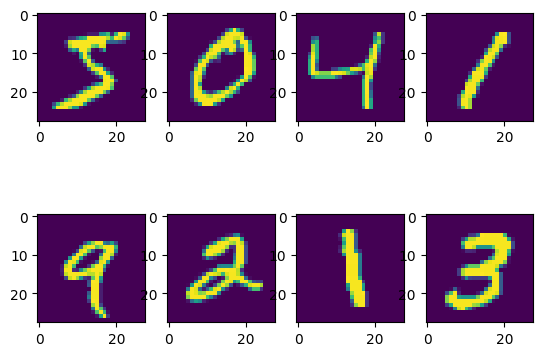

In [6]:
for i in range(8):
    plt.subplot(240+1+i)
    plt.imshow(X_train[i])

Data preprocessing:
1. Reshape images
2. Convert image values into float
3. Normalization
4. Create one-hot encoding label

In [7]:
def preprocess_data(X_train, y_train, X_test, y_test):
    X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], X_train.shape[2], 1).astype('float32')/255.0
    X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], X_test.shape[2], 1).astype('float32')/255.0

    y_train = to_categorical(y_train)
    y_test = to_categorical(y_test)
  
    return X_train, y_train, X_test, y_test

Construct LeNet model, which consists of:
1. Convolutional layer
2. Max-pooling layer
3. Convolutional layer
4. Max-pooling layer
5. Flatten layer
6. Connected layer
7. Output layer
We consider loss function as categorical crossentropy with SGD method and learning rate 0.01 to optimize it. 

In [8]:
def LeNet():
    model = Sequential()
    
    model.add(Conv2D(filters = 6, kernel_size = (5,5), padding = 'same', 
                   activation = 'relu', input_shape = (28,28,1)))
    
    model.add(MaxPooling2D(pool_size = (2,2)))
    
    model.add(Conv2D(filters = 16, kernel_size = (5,5), activation = 'relu'))
    
    model.add(MaxPooling2D(pool_size = (2,2)))
    
    model.add(Flatten())
    
    model.add(Dense(120, activation = 'relu'))
    
    model.add(Dense(10, activation = 'softmax'))
    
    optimize = SGD(lr=0.01)
    
    model.compile(loss=categorical_crossentropy, 
                optimizer = optimize, 
                metrics = ['accuracy'])
    return model

In [9]:
LeNet_model = LeNet()
LeNet_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 6)         156       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 6)        0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 10, 10, 16)        2416      
                                                                 


2022-12-16 12:42:10.379280: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
/Users/alice/ENTER/lib/python3.9/site-packages/keras/optimizers/optimizer_v2/gradient_descent.py:111: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


 max_pooling2d_1 (MaxPooling  (None, 5, 5, 16)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 400)               0         
                                                                 
 dense (Dense)               (None, 120)               48120     
                                                                 
 dense_1 (Dense)             (None, 10)                1210      
                                                                 
Total params: 51,902
Trainable params: 51,902
Non-trainable params: 0
_________________________________________________________________


Construct Alexnet model, which consists of:
1. Convolutional layer
2. Max-pooling layer
3. Convolutional layer
4. Max-pooling layer
5. Convolutional layer
6. Convolutional layer
7. Convolutional layer
8. Max-pooling layer
9. Fully connected hidden layer
10. Fully connected hidden layer
11. Fully connected output layer
We consider loss function as categorical crossentropy and set learning rate as 0.1, use SGD.

In [14]:
def Alexnet():
    
    model = models.Sequential()
   
    model.add(Conv2D(filters=32, input_shape=(28, 28, 1), kernel_size=(3, 3), strides=(1, 1), padding='valid'))
    model.add(Activation('relu'))
    
    model.add(MaxPooling2D(pool_size=(3, 3), strides=(1, 1), padding='valid'))
    
    model.add(Conv2D(filters=32, kernel_size=(3, 3), strides=(1, 1), padding='valid'))
    model.add(Activation('relu'))
    
    model.add(MaxPooling2D(pool_size=(3, 3), strides=(1, 1), padding='valid'))
    
    model.add(Conv2D(filters=64, kernel_size=(3, 3), strides=(1, 1), padding='valid'))
    model.add(Activation('relu'))
    
    model.add(Conv2D(filters=64, kernel_size=(3, 3), strides=(1, 1), padding='valid'))
    model.add(Activation('relu'))
    
    model.add(Conv2D(filters=64, kernel_size=(3, 3), strides=(1, 1), padding='valid'))
    model.add(Activation('relu'))
    
    model.add(MaxPooling2D(pool_size=(3, 3), strides=(2, 2), padding='valid'))
    
    model.add(Flatten())
    
    model.add(Dense(512))
    model.add(Activation('relu'))
    
    model.add(Dropout(0.3))
    
    model.add(Dense(10))
    model.add(Activation('softmax'))
    
    model.compile(loss=categorical_crossentropy, 
                  optimizer='adam', 
                  metrics=['accuracy'])
    
    
    return model

In [15]:
Alexnet_model = Alexnet()
Alexnet_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 activation (Activation)     (None, 26, 26, 32)        0         
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 24, 24, 32)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 22, 22, 32)        9248      
                                                                 
 activation_1 (Activation)   (None, 22, 22, 32)        0         
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 20, 20, 32)       0         
 2D)                                                  

Model Training
We will train both LeNet model and AlexNet model on MINIST dataset and compare their accuracy.

In [11]:
def training(model, X_train, X_test, y_train, y_test, epochs=50,batch_size=128):
    X_train, y_train, X_test, y_test = preprocess_data(X_train, y_train, X_test, y_test)
    history = model.fit(X_train, y_train, epochs = epochs, batch_size = batch_size, 
                      steps_per_epoch = X_train.shape[0]//batch_size, 
                      validation_data = (X_test, y_test), 
                      validation_steps = X_test.shape[0]//batch_size, verbose = 1)
    _, acc = model.evaluate(X_test, y_test, verbose = 1)
    print('%.3f' % (acc * 100.0))
    plt.figure(figsize = (10,6))
    plt.plot(history.history['accuracy'], color = 'blue', label = 'train')
    plt.plot(history.history['val_accuracy'], color = 'red', label = 'val')
    plt.legend()
    plt.title('Accuracy')
    plt.show()

Epoch 1/50
468/468 [==============================] - 12s 24ms/step - loss: 1.1020 - accuracy: 0.6827 - val_loss: 0.3355 - val_accuracy: 0.8995
Epoch 2/50
468/468 [==============================] - 11s 25ms/step - loss: 0.2896 - accuracy: 0.9131 - val_loss: 0.2174 - val_accuracy: 0.9358
Epoch 3/50
468/468 [==============================] - 12s 25ms/step - loss: 0.2132 - accuracy: 0.9369 - val_loss: 0.1705 - val_accuracy: 0.9514
Epoch 4/50
468/468 [==============================] - 11s 24ms/step - loss: 0.1687 - accuracy: 0.9505 - val_loss: 0.1448 - val_accuracy: 0.9537
Epoch 5/50
468/468 [==============================] - 12s 25ms/step - loss: 0.1407 - accuracy: 0.9580 - val_loss: 0.1220 - val_accuracy: 0.9630
Epoch 6/50
468/468 [==============================] - 12s 26ms/step - loss: 0.1204 - accuracy: 0.9642 - val_loss: 0.1139 - val_accuracy: 0.9629
Epoch 7/50
468/468 [==============================] - 12s 26ms/step - loss: 0.1059 - accuracy: 0.9681 - val_loss: 0.0964 - val_accuracy:

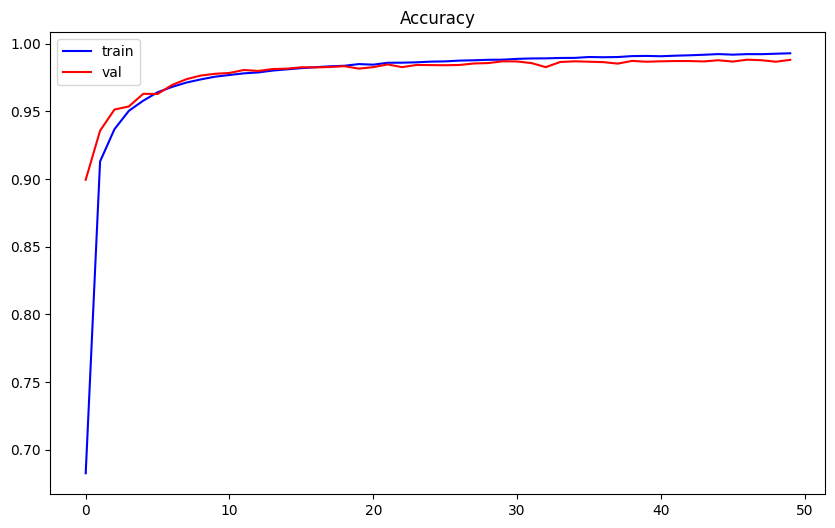

In [12]:
training(LeNet_model,X_train,X_test,y_train,y_test)

Epoch 1/50
468/468 [==============================] - 97s 205ms/step - loss: 0.1826 - accuracy: 0.9430 - val_loss: 0.0546 - val_accuracy: 0.9822
Epoch 2/50
468/468 [==============================] - 97s 207ms/step - loss: 0.0565 - accuracy: 0.9823 - val_loss: 0.0347 - val_accuracy: 0.9891
Epoch 3/50
468/468 [==============================] - 97s 207ms/step - loss: 0.0427 - accuracy: 0.9868 - val_loss: 0.0333 - val_accuracy: 0.9892
Epoch 4/50
468/468 [==============================] - 104s 221ms/step - loss: 0.0340 - accuracy: 0.9896 - val_loss: 0.0295 - val_accuracy: 0.9908
Epoch 5/50
468/468 [==============================] - 106s 226ms/step - loss: 0.0291 - accuracy: 0.9910 - val_loss: 0.0437 - val_accuracy: 0.9883
Epoch 6/50
468/468 [==============================] - 107s 230ms/step - loss: 0.0264 - accuracy: 0.9917 - val_loss: 0.0337 - val_accuracy: 0.9906
Epoch 7/50
468/468 [==============================] - 106s 227ms/step - loss: 0.0225 - accuracy: 0.9926 - val_loss: 0.0285 - va

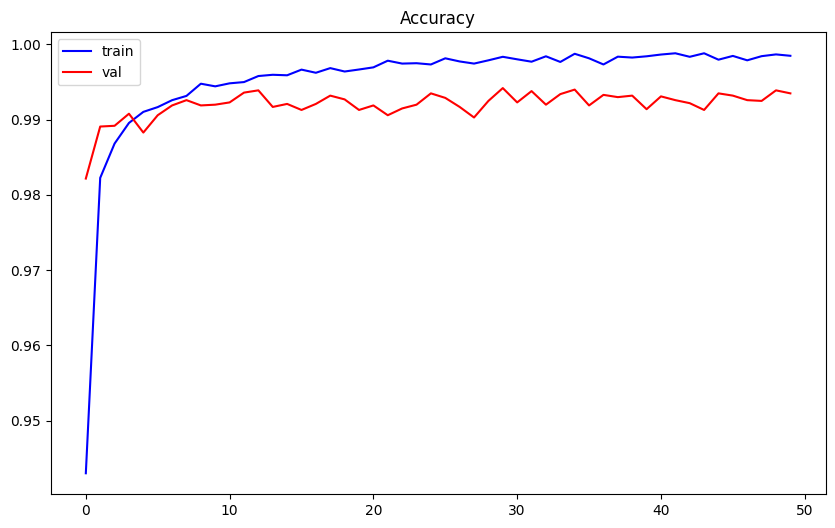

In [16]:
training(Alexnet_model,X_train,X_test,y_train,y_test)

In [17]:
def predict_label(y_test_pred,model):
    for i in range(len(X_test)):
        img = X_test[i].reshape(1,28,28,1).astype('float32')/255.0

        vec_p = model.predict(img)

        y_p = np.argmax(vec_p)
        y_test_pred.append(y_p)
    
    y_test_pred = np.asarray(y_test_pred)
    return(y_test_pred)

In [18]:
y_test_pred=[]
y_test_predict_LeNet = predict_label(y_test_pred,LeNet_model)

1/1 [==============================] - 0s 16ms/step


Text(70.72222222222221, 0.5, 'True classes')

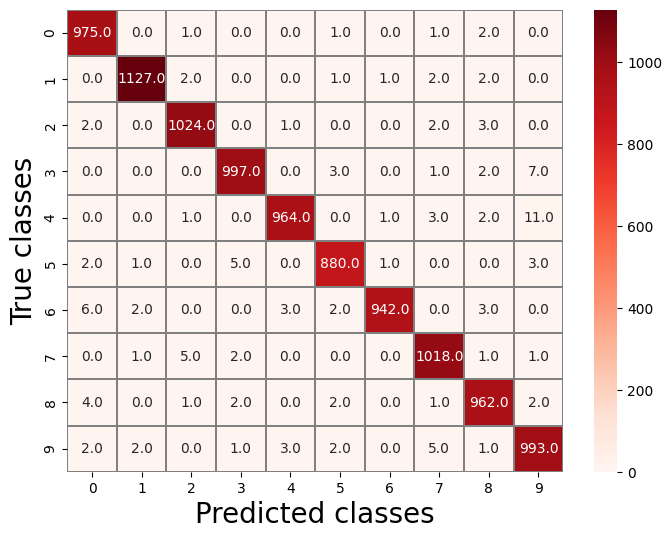

In [28]:
C_M = confusion_matrix(y_test, y_test_predict_LeNet)

plt.figure(figsize = (8,6))
sns.heatmap(C_M, linewidths = 0.1, cmap = 'Reds', linecolor = 'gray', 
            fmt = '.1f', annot = True)
plt.xlabel('Predicted classes', fontsize = 20)
plt.ylabel('True classes', fontsize = 20)

In [22]:
%%bash
pip install seaborn

In [24]:
import seaborn as sns

In [29]:
y_test_pred=[]
y_test_predict_AlexNet = predict_label(y_test_pred,Alexnet_model)

1/1 [==============================] - 0s 19ms/step


Text(70.72222222222221, 0.5, 'True classes')

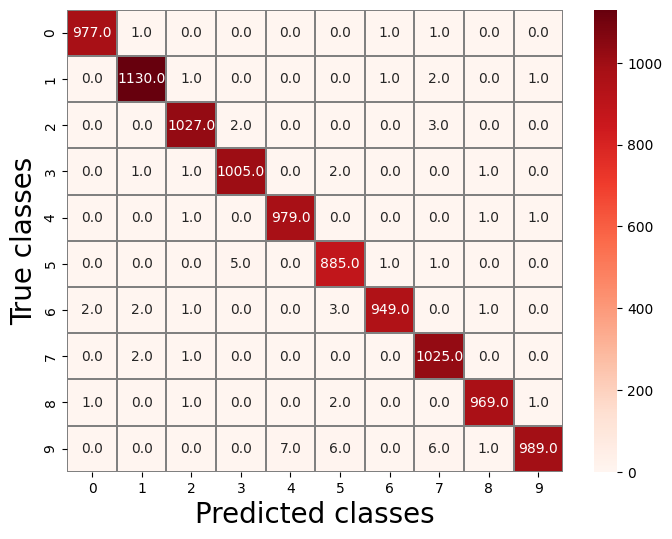

In [30]:
C_M = confusion_matrix(y_test, y_test_predict_AlexNet)

plt.figure(figsize = (8,6))
sns.heatmap(C_M, linewidths = 0.1, cmap = 'Reds', linecolor = 'gray', 
            fmt = '.1f', annot = True)
plt.xlabel('Predicted classes', fontsize = 20)
plt.ylabel('True classes', fontsize = 20)